In [53]:
import geopandas
import pandas
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx

LatLong = {'init': 'EPSG:4326'}

In [8]:
stops_df = geopandas.read_file('LOCAL/proposedStops_eastSide/proposedStops_eastSide.dbf')
stops_df.head()

,id,geometry
0,8,POINT (3117831.215609025 10064647.51036373)
1,11,POINT (3130602.364981864 10064884.82393999)
2,44,POINT (3118234.526940965 10065726.15975965)
3,48,POINT (3116948.056468503 10065063.88655742)
4,53,POINT (3119521.180218406 10065246.69401847)


In [33]:
stops_df = stops_df.to_crs(LatLong)
stops_df.crs

{'init': 'EPSG:4326'}

In [23]:
AoA_Boundary = geopandas.read_file('LOCAL/AoA_Boundary/AoA_Boundary.dbf')

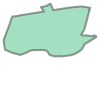

In [28]:
AoA_LatLong = AoA_Boundary.to_crs(LatLong)
AoA_LatLong_geo = AoA_LatLong.geometry[0]
AoA_LatLong_geo

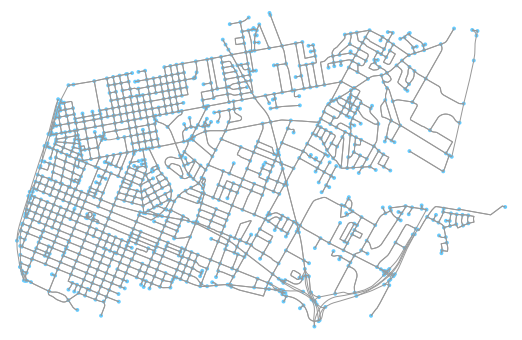

In [31]:
# Create Graph
G = ox.graph_from_polygon(AoA_LatLong_geo, network_type='drive')
ox.plot_graph(G)
plt.show()

In [48]:
# define a lat-long point, create network around point, define origin/destination nodes
origin_point = stops_df.geometry[0]
origin_xy = (origin_point.y, origin_point.x)
origin_node = ox.get_nearest_node(G, origin_xy)

In [50]:
destination_point = stops_df.geometry[1]
destination_xy = (destination_point.y, destination_point.x)
destination_node = ox.get_nearest_node(G, destination_xy)

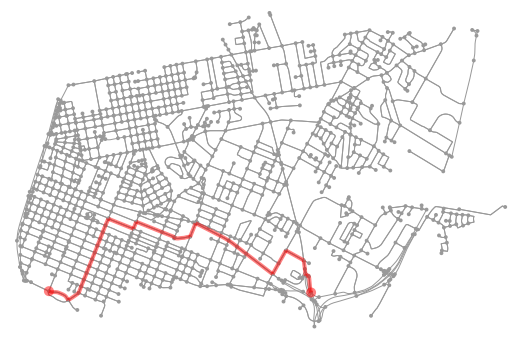

In [54]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G, route)

In [59]:
print(nx.shortest_path_length(G,source=origin_node,target=destination_node))

30


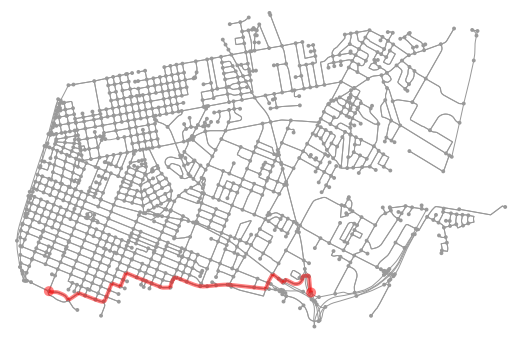

In [57]:
# find the route between these nodes then plot it
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
fig, ax = ox.plot_graph_route(G, route)